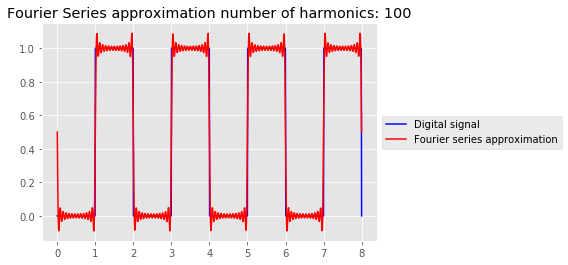

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor

plt.style.use("ggplot")

# Setup
steps = np.linspace(0,8,1000)
signal_list = list('01010101')
T = 8
harmonic_count = 100

# Digital signal function
def digital_signal(x):
    global signal_list
    index = int(floor(x))
    if index >= len(signal_list):
        return 0
    return int(signal_list[index])

# Coefficients
def an(n, x):
    return -(np.cos(np.pi*n/2) - np.cos(np.pi*n/4) + np.cos(np.pi*n) - np.cos(3*np.pi*n/4) \
             + np.cos(3*np.pi*n/2) - np.cos(5*np.pi*n/4) + np.cos(2*np.pi*n) - np.cos(7*np.pi*n/4))/(np.pi * n)

def bn(n, x):
    return (np.sin(np.pi*n/2) - np.sin(np.pi*n/4) + np.sin(np.pi*n) - np.sin(3*np.pi*n/4) \
            + np.sin(3*np.pi*n/2) - np.sin(5*np.pi*n/4) + np.sin(2*np.pi*n) - np.sin(7*np.pi*n/4))/(np.pi * n)

def wn(n):
    global T
    return (2*np.pi*n)/T


# Fourier Series function
def fourier_series(n_max,x):
    a0 = 1/2
    partialSums = a0
    for n in range(1, (n_max + 1)):
        partialSums = partialSums + an(n, x)*np.sin(wn(n)*x) + bn(n, x)*np.cos(wn(n)*x)

    return partialSums

digital_signal_values = []
fourier_series_values = []

for i in steps:
    digital_signal_values.append(digital_signal(i))
    fourier_series_values.append(fourier_series(harmonic_count,i))


# Draw chart    
plt.plot(steps,digital_signal_values,color="blue",label="Digital signal")
plt.plot(steps,fourier_series_values,color="red",label="Fourier series approximation")
plt.title("Fourier Series approximation number of harmonics: "+str(harmonic_count))

# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()